# Introducción

El presente documento tiene como principal objetivo construir una red neuronal de regresión que pueda predecir el precio de las vivienda usando los datos [Boston Housing](https://www.kaggle.com/c/boston-housing). En este documento se presenta inicialmente una exploración de los datos y analisis de los mismos, al final se desarrollara el módelo de red neuronal de regresión para realizar la predicción.

Inicialmente se lee el dataset.

In [1]:
import pandas as pd
data = pd.read_csv('./housing.csv', sep='\s+', names=['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat','medv'])

Ahora se observa superficialmente el contenido del dataset, se observa que el archivo contiene 33 columnas (33 posibles variables). La columna id no sigue una secuencia por lo cual no es muy util para el modelo final. La columna diagnosis es la columna que nos da la información de si esa fila corresponde al diagnóstico donde 'B' significa tumor beningno y 'M' tumor maligno. La última columna Unnamed: 32 solo tiene valores "NaN" por lo cual no es útil.

In [2]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Ahora se observa superficialmente el contenido del dataset, se observa que el archivo contiene 14 columnas (14 posibles variables). Las descripciones de cada columna son las siguientes:

1. crim: Tasa de criminalidad per cápita por zona.
2. zn: Proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.
3. indus: Proporción de acres comerciales no minoristas por zona.
4. chas: Variable dummy de Charles River ($= 1$ si el tramo limita con el río; $0$ en caso contrario).
5. nox: Concentración de óxidos de nitrógeno (partes por $10 millones$).
6. rm: Número medio de habitaciones por vivienda.
7. age: Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
8. dis: Media ponderada de las distancias a cinco centros de empleo de Boston.
9. rad: Índice de accesibilidad a carreteras radiales.
10. tax: Tasa de impuesto a la propiedad de valor total por $\$10,000$.
11. ptratio: Razón alumno-profesor por zona.
12. b: $1000 (Bk - 0.63)^2$ donde Bk es la proporción de afroamericanos por zona.
13. lstat: estatus más bajo de la población (porcentaje).
14. medv: valor medio de las viviendas ocupadas por sus propietarios en $\$1000s$.

En esta caso la variable objetivo o dependiente, es decir, la que queremos predecir es `medv`

<br> 
Cantidad y descripción general de los datos

In [3]:
import numpy as np 

np.shape(data)

(506, 14)

In [4]:
print(data.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [5]:
data.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
medv       229
dtype: int64

In [6]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

<br><br>

De acuerdo a los histogramas a continuación, se puede observar que la variable objetivo `medv` tiene un comportamiento parecido a una distribución normal al igual que la variable `rm`, las variables `indus`, `age`, `rad` y `tax` muestran un comportamiendo parecido a una distribución bimodal y el resto de variables tienen un comportamiento asimétrico, donde las variables `crim`, `zn` y `b` tienen un comportamiento asimétrico mas pronunciado. 

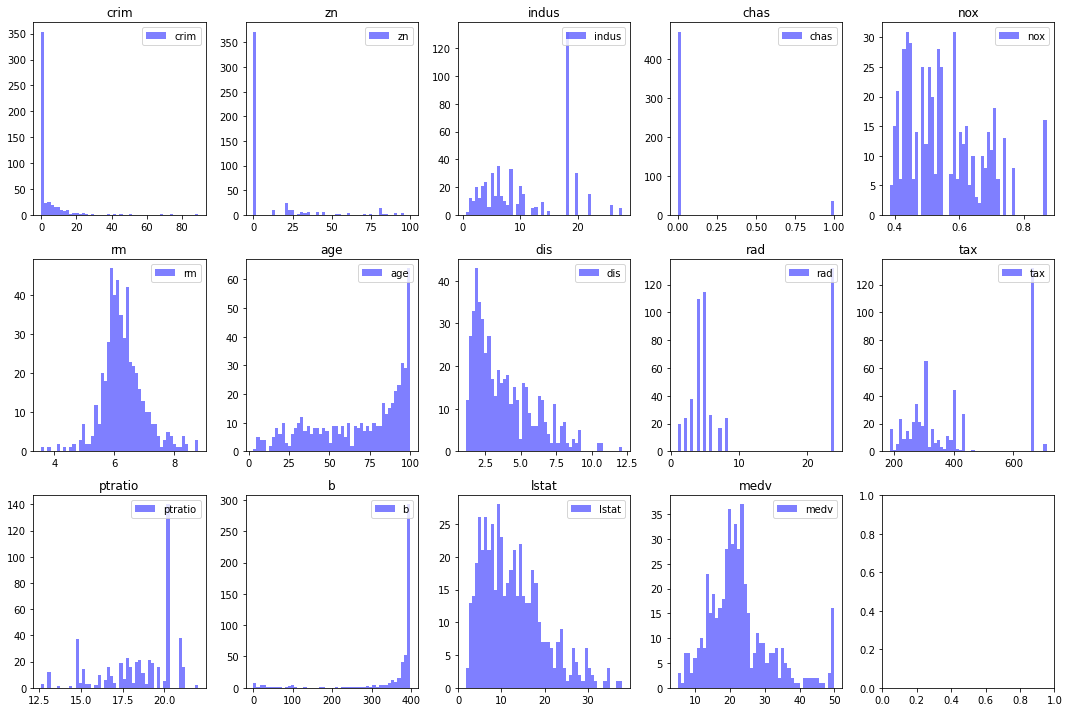

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10))
axes = axes.ravel()
axes = axes[:-1]
for index,axe in enumerate(axes):
    axe.hist(data[data.columns[index]], bins=50, alpha=0.5, stacked=True, label=[data.columns[index]],color=['b'])
    axe.legend(loc='upper right')
    axe.set_title(data.columns[index])
plt.tight_layout()
plt.show()


<br><br>
De acuerdo a las siguientes gráficas de cajas, se observa que las variables `crim`, `zn`, `chas`, `rm`, `dis`, `b`, `lstat` y `medv` presentan valores atípicos. Por lo cual las mejores variables de acuerdo a estas gráficas son `indus`, `nox`, `age`, `rad` y `tax`. 

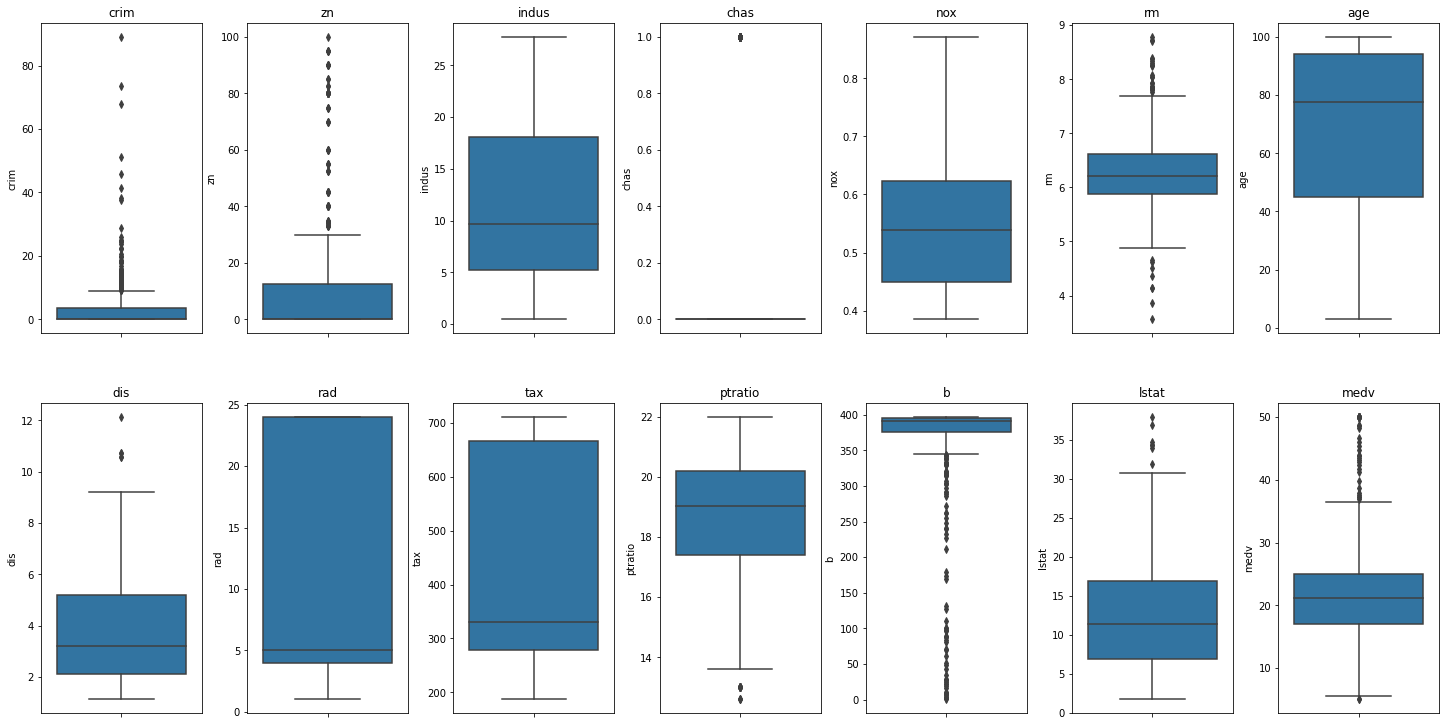

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
axes = axes.ravel()
for index,axe in enumerate(axes):
    sns.boxplot(y=data.columns[index], data=data, ax=axe)
    axe.set_title(data.columns[index])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<br> <br>
De acuerdo a la siguiente gráfica de correlación de las variables, se observa que las variables `tax` y `rad` están altamente correlacionadas por lo cual solo se usará `tax` que es la que guarda mayor correlación con las demás variables. Las columnas `indus`, `nox`, `rm`, `tax`, `ptratio` y `lstat` tienen una correlación cercana a $0.5$ con la variable objetivo `medv`. Adicionalmente la variable `dis` tiene una correlación mediana/alta con las variables `indus`, `nox` y `age` por lo cual las todas las variables mencionadas anteriormente junto las correlacionadas con `medv` son muy buenas candidatas para el modelo.

<AxesSubplot:>

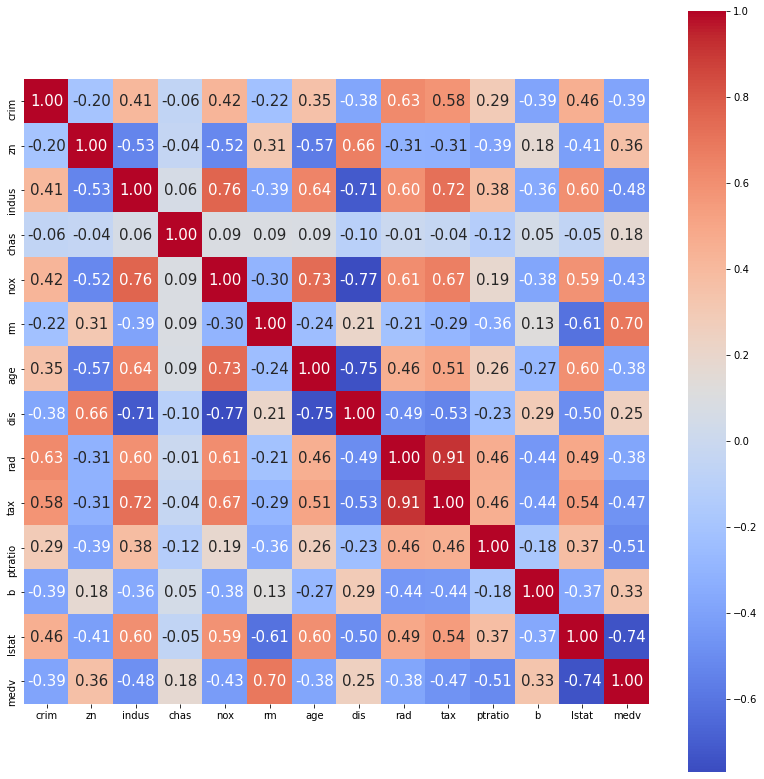

In [20]:
correlation = data.corr()
plt.figure(figsize=(14,14))
sns.heatmap(correlation, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data.columns, yticklabels= data.columns,
           cmap= 'coolwarm')

De acuerdo a los gráficos anteriores las variables que se emplearan para el modelo son `indus`, `dis`, `nox`, `age`, `tax`, `rm`, `ptratio` y `lstat` 

In [170]:
# prediction_var = ['indus','dis','nox','age','tax','rm','ptratio','lstat']
prediction_var = ['indus','dis','nox','age','tax','rm','ptratio','lstat']


<br>
Ahora se dividen los datos para entrenamiento y pruebas.

In [171]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.2)

train_x = train[prediction_var] 
train_y = train.medv

test_x = test[prediction_var]
test_y = test.medv 

<br>
Normalización de los datos para mejorar los resultados del modelo.

In [173]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

train_x = MinMaxScaler().fit_transform(train_x)
print("Datos entrenamiento :", train_x.shape)

test_x = MinMaxScaler().fit_transform(test_x)
print("Datos pruebas :", test_x.shape)

Datos entrenamiento : (404, 8)
Datos pruebas : (102, 8)


Función que recibe como parámetro el modelo e imprime los datos relevantes del mismo (se define principalmente para no repetir código).

In [183]:
def evaluate_model(model):
    
    # Cross Validation en datos de entrenamiento
    cv_score = cross_val_score(estimator = model, X = train_x, y = train_y, cv = 10)

    # R2 en datos de entrenamiento
    pred_train_y = model.predict(train_x)
    r2_score_train = r2_score(train_y, pred_train_y)

    # R2 en en datos de pruebas
    pred_test_y = model.predict(test_x)
    r2_score_test = r2_score(test_y, pred_test_y)

    # RMSE en datos de pruebas
    rmse_linear = (np.sqrt(mean_squared_error(test_y, pred_test_y)))
    print("Modelo: ", model)
    print("    Cross validation:         ", cv_score.mean())
    print("    R2 score (entrenamiento): ", r2_score_train)
    print("    R2 score (pruebas):       ", r2_score_test)
    print("    RMSE:                     ", rmse_linear)

<br>
El modelo que se va plantear a continuación será una regresión lineal.

In [193]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

linear_regression_model = LinearRegression()
linear_regression_model.fit(train_x, train_y)
evaluate_model(linear_regression_model)

Modelo:  LinearRegression()
    Cross validation:          0.6605752452322793
    R2 score (entrenamiento):  0.7006316999057027
    R2 score (pruebas):        0.7032880015586818
    RMSE:                      4.146919790265201


<br><br>
Adicionalmente se va plantear una regresión mediante bosques aleatorios, teniendo en cuenta que en varíos trabajos de Kaggle es una de las técnicas que mejores resultados ha dado para este problema. 

In [192]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)
rf_regressor.fit(train_x, train_y)
evaluate_model(rf_regressor)

Modelo:  RandomForestRegressor(n_estimators=500, random_state=0)
    Cross validation:          0.856224668875765
    R2 score (entrenamiento):  0.981449938577428
    R2 score (pruebas):        0.8580794028576635
    RMSE:                      2.8680108890323024
